# Датасет ирисы Фишера
## Подготовка датасета


Импортируем датасет с ирисами из *skrlearn.datasets*. Столбцы *sl*, *sw*, *pl*, *pw* - это некоторые параметры различных ирисов, а *target* - это тип ириса.

In [8]:
from sklearn.datasets import load_iris
import numpy  as np
import pandas as pd

iris = load_iris()
iris_pd=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_pd = iris_pd.rename(columns={'sepal length (cm)': 'sl', 'sepal width (cm)': 'sw', 'petal length (cm)': 'pl', 'petal width (cm)': 'pw'})

print(iris_pd)
print(iris_pd.describe())

      sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2     0.0
1    4.9  3.0  1.4  0.2     0.0
2    4.7  3.2  1.3  0.2     0.0
3    4.6  3.1  1.5  0.2     0.0
4    5.0  3.6  1.4  0.2     0.0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3     2.0
146  6.3  2.5  5.0  1.9     2.0
147  6.5  3.0  5.2  2.0     2.0
148  6.2  3.4  5.4  2.3     2.0
149  5.9  3.0  5.1  1.8     2.0

[150 rows x 5 columns]
               sl          sw          pl          pw      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.00000

# Разведочный анализ данных

### Построить диаграмму Тьюки, оценить диапазон изменения данных.

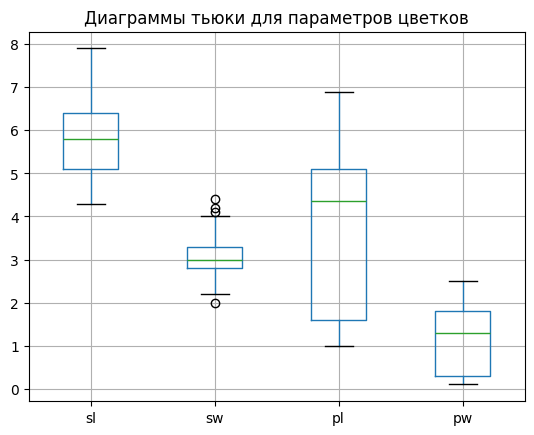

In [9]:
import matplotlib.pyplot as plt

iris_pd.iloc[:,:-1].boxplot()
plt.title('Диаграммы тьюки для параметров цветков')
plt.show()

Значения всех переменных сравнимы по величине, но находятся в нескольких разных диапазонах и имеют разный разброс. Также стоит отметить, что для значений sw имеем большое количество выбросов.

### Проанализировать корреляционные зависимости между исследуемыми переменными. Необходимо построить тепловую карту.

Парная корреляция между i и j переменными можно найти по следующей формуле: 
$$ \hat{r}_{ik} = \frac{ \hat{ \sigma}_{ik} }{\hat{\sigma}_{ii}\hat{\sigma}_{kk}} $$

              sl        sw        pl        pw    target
sl      1.000000 -0.117570  0.871754  0.817941  0.782561
sw     -0.117570  1.000000 -0.428440 -0.366126 -0.426658
pl      0.871754 -0.428440  1.000000  0.962865  0.949035
pw      0.817941 -0.366126  0.962865  1.000000  0.956547
target  0.782561 -0.426658  0.949035  0.956547  1.000000


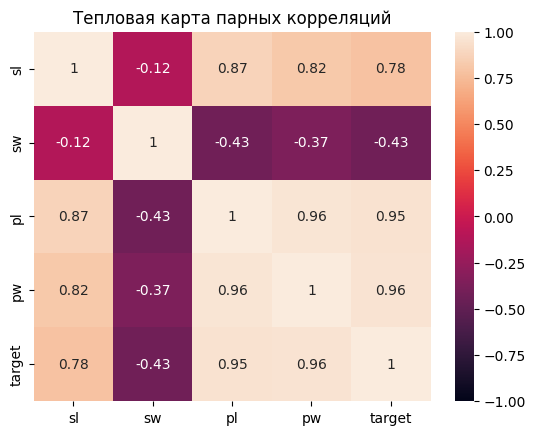

In [10]:
import seaborn as sns

corr_matr = iris_pd.corr()
print(corr_matr)

sns.heatmap(corr_matr, annot= True, vmin=-1, vmax=1)
plt.title('Тепловая карта парных корреляций')
plt.show()

Практически все переменные имеют высокие линейные связи друг с другом, кроме пар содержащих sw. Еще можно обратить внимание, что парные корреляции отдельных переменных со всеми остальными имеют похожие значения.

### Рассчитать частные коэффициенты корреляции, сравнить их со значениями парных коэффициентов корреляции. Необходимо построить тепловую карту.

Частная корреляция между i и j переменными можно найти по следующей формуле: 
$$ \hat{r}_{ik|1,\dots,L} = - \frac{\hat{R}_{ik}}{\sqrt{\hat{R}_{ii}\hat{R}_{kk}}}, \text{где }\hat{R}_{xy}\text{ -- алгебраическое дополнение корреляционной матрицы}  $$

              sl        sw        pl        pw    target
sl      1.000000  0.610735  0.723756 -0.220409 -0.159156
sw      0.610735  1.000000 -0.565057  0.336649 -0.055676
pl      0.723756 -0.565057  1.000000  0.578470  0.316796
pw     -0.220409  0.336649  0.578470  1.000000  0.472174
target -0.159156 -0.055676  0.316796  0.472174  1.000000


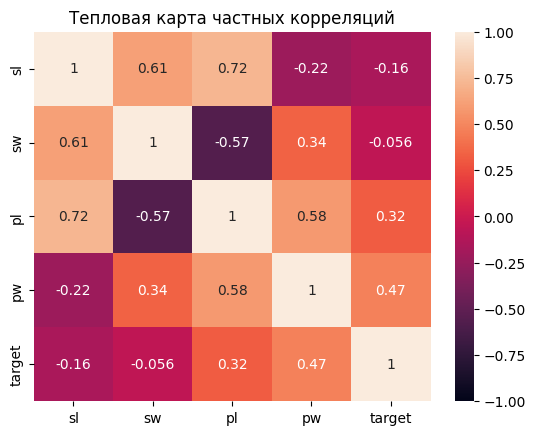

In [11]:
import pingouin

pcorr_matr = iris_pd.pcorr()
print(pcorr_matr)

sns.heatmap(pcorr_matr, annot= True, vmin=-1, vmax=1)
plt.title('Тепловая карта частных корреляций')
plt.show()

По сравнению с матрицей парных корреляций частные корреляции отдельных переменных со всеми остальными значительно различаются, в том числе могут менять знак. Можно отметить, что тип цветка, судя по значениям коэффициентов частной корреляции, в большей мере определяется параметрами *pl* и *pw*.

Расчитаем коэффициент множественной корреляции для target. Это можно сделать по следующей формуле:
$$\hat{R}_{y|x^{(1)}\dots x^{(M-1)}} = \sqrt{1 - \frac{|\hat{R}|}{\hat{R}_{ii}}} $$

In [12]:
#Количество параметров
n = len(iris_pd)
k = len(iris_pd.iloc[0]) - 1

def minor(A, i, j):
    a_shape = A.shape[0]
    M = np.eye(a_shape - 1)
    M[:i,:j] = A[:i,:j]
    M[:i,j:] = A[:i,j+1:]
    M[i:,:j] = A[i+1:,:j]
    M[i:,j:] = A[i+1:,j+1:]

    return M

def alg_dop(A, i, j):
    M = minor(A, i, j)
    return (-1)**(i+j) * np.linalg.det(M)

R = corr_matr.values
#Множественная корреляция y к x-ам
R_y_x = np.sqrt(1 - np.linalg.det(R)/alg_dop(R, k, k))
print(f'Коэффициент множественной кореляции target: {R_y_x:.3f}')

Коэффициент множественной кореляции target: 0.965


По большому значению коэффициента множественной корреляции, можно сказать, что тип цветка имеет сильную линейную связь с его параметрами.

### Проверить предположение о распределении признаков по нормальному закону критерием Колмогорова-Смирнова. Необходимо рассчитать значения статистик.

In [13]:
import scipy.stats

kstest_res = [ scipy.stats.kstest(iris_pd.iloc[:,i], 'norm') for i in range(len(iris_pd.iloc[0]))]
for elem in kstest_res:
    print(f'Значение статистики: {elem.statistic}, pvalue: {elem.pvalue}')

Значение статистики: 0.999991460094529, pvalue: 0.0
Значение статистики: 0.9794298858198347, pvalue: 1.9343513094431716e-253
Значение статистики: 0.8765328487477231, pvalue: 1.4044248603466388e-136
Значение статистики: 0.5459263761057697, pvalue: 1.876499271371568e-42
Значение статистики: 0.5080114127352096, pvalue: 2.0970191237053004e-36


По результатам критерия Колмогорова-Смирнова данные столбцы противоречат предположению о нормальности закона распределения данных величин, поскольку значение pvalue в каждой из них практически нулевое.

### Сделать выводы о степени однородности данных, силе зависимости между переменными, виде функции распределения, наиболее информативных переменных.

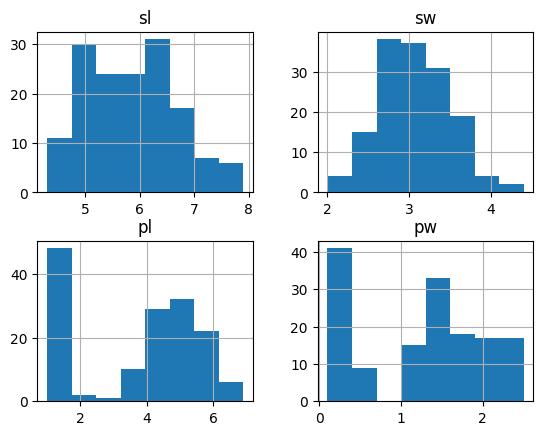

In [14]:
iris_pd.iloc[:,:-1].hist(bins = 8)
plt.show()

Построим гистограммы имеющихся данных. По ним видно, что оценки законов распределения данных выборок весьма различны и отличаются от нормального закона распределения, что подтвердил критерий Колмогорова-Смирнова. Заметим, что характер оценок дифференциального закона распределения для *pl* и *pw* визуально похож.

Судя по корреляционным коэффициентам, параметры ирисов имеют, как минимум, небольшую линейную связь. Есть связи как прямые так и обратные и их силы различны. Смотря на коэффициенты частной корреляции, можно предположить, что наиболее информативными для определения типа ириса являются параметры *pl* и *pw*, поскольку эти параметры имеют наибольшие оценки частной корреляции с типом цветка.

## Построение регрессии

### Определить входные и выходные переменные. Построить парную регрессию и множественную регрессию (Используем sklearn).

При построении парной линейной регрессии мы рассматриваем модель вида: $ \hat{y} = \hat{b}_0 + \hat{b}_1\cdot x $, где коэффициенты $\hat{b}_0,\,\hat{b}_1$ - это неизвестные, которые находятся по выборке.
Модель множественной линейной регрессии имеет вид: $ \hat{y} = \hat{b}_0 + \widehat{\vec{b}^T}\vec{x} $

Для оценки качества модели будем использовать коэффициенты детерминации и скорректированной детерминации:
$$ R^2 = 1 - \frac{Q_{\text{ост}}}{Q_{\text{общ}}},\;R^2_\text{корр} = 1 - \frac{S^2_\text{ост}}{S^2_\text{общ}} $$
$$ \text{Здесь } Q_\text{общ} = \sum\limits_{j=1}^N (y_j - \bar{y_j})^2,\;Q_\text{ост} = \sum\limits_{j=1}^N (\hat{y}_j - y_j)^2,\; S^2_\text{общ} = \frac{Q_\text{общ}}{N-1},\;S^2_\text{ост} = \frac{Q_\text{ост}}{N-k} $$

В нашем наборе данных прикладной задачей было бы определение типа цветка ирисов по его параметрам. Поэтому, в качестве входных переменных, можно взять параметры цветков *sl*, *sw*, *pl*, *pw*, а выходной переменной выбрать тип цветка.

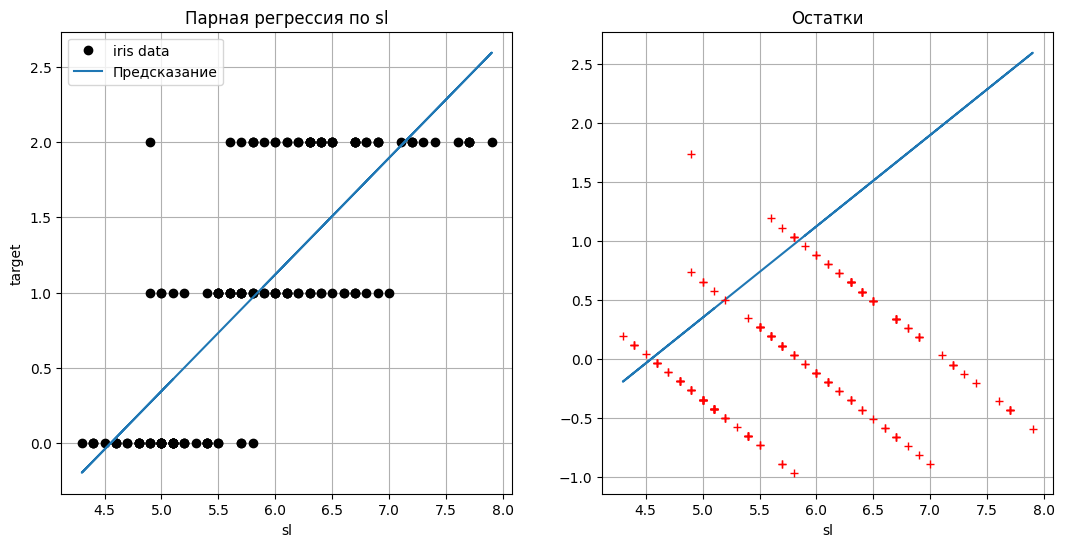

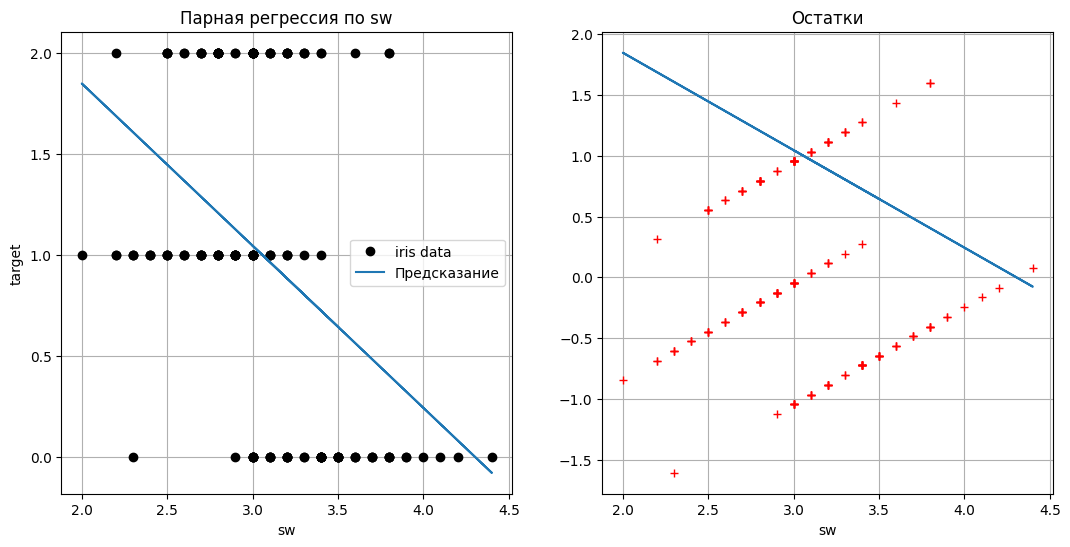

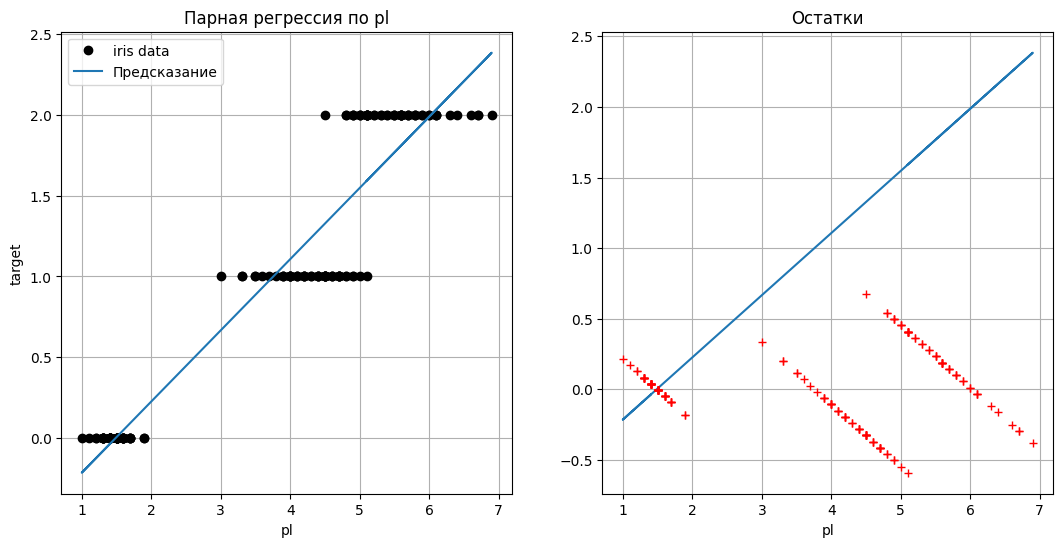

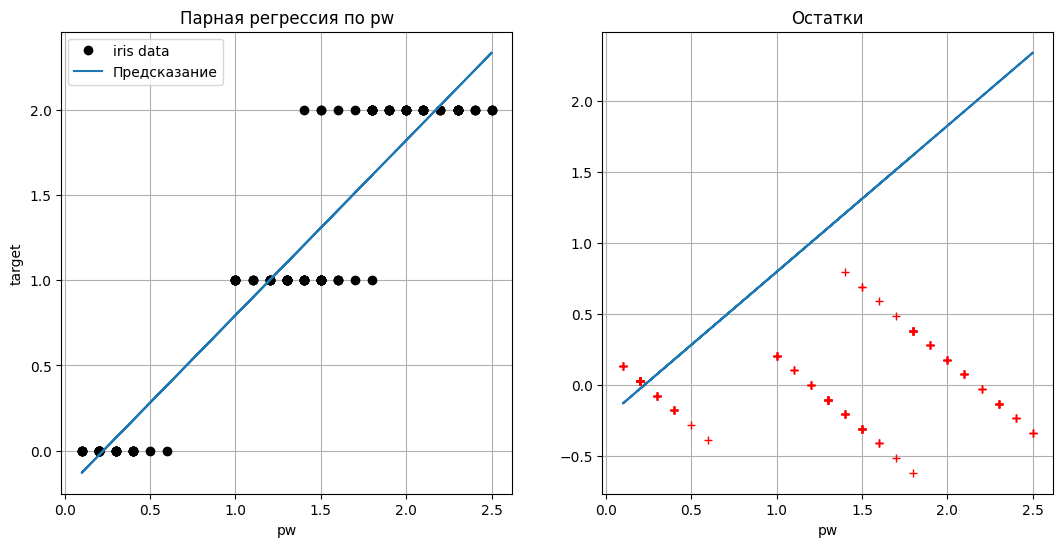

Коэффициенты детерминации
{'sl': 0.6124020815321121, 'sw': 0.18203667417169878, 'pl': 0.9006668599219426, 'pw': 0.9149828000329598}
Коэффициенты скорректированной детерминации
{'sl': 0.612402081532112, 'sw': 0.1820366741716989, 'pl': 0.9006668599219426, 'pw': 0.9149828000329598}
Стандартная ошибка
{'sl': 0.05234552565475003, 'sw': 0.028539126889794004, 'pl': 0.06348093690928934, 'pw': 0.06398345703536729}


In [20]:
from sklearn import linear_model
#Получение парной линейной регресси
def pair_regress(data_pd, x_name, y_name):
    x = data_pd[x_name].values.reshape(-1, 1)
    y = data_pd[y_name].values.reshape(-1, 1)

    reg = linear_model.LinearRegression()
    reg.fit(x,y)

    return reg

#Построить графики результатов регрессии
def plot_regr_results(x, y, y_pred):
    residues = y - y_pred
    plt.figure(figsize=(12.8,6))
    plt.subplot(1, 2, 1)
    plt.grid()
    plt.plot(x, y, 'ko', label='iris data')
    plt.plot(x, y_pred, label='Предсказание')
    plt.title(f'Парная регрессия по {column}')
    plt.xlabel(column)
    plt.ylabel('target')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.grid()
    plt.plot(x, y_pred, label='Предсказание')
    plt.plot(x, residues, 'r+', label='Остатки')
    plt.title('Остатки')
    plt.xlabel(column)
    plt.show()

#Получение коэффициентов детерминации и скорретированной детерминации
def calc_r_squared(y, y_pred, k):
    res = []
    n = len(y)
    delta_y = (y - y.mean()).reshape(-1)
    residues = (y - y_pred).reshape(-1)
    Q = np.dot(delta_y, delta_y)
    S = Q / (n-1)
    Q_res = np.dot(residues, residues)
    S_res = Q_res / (n-k)
    res.append(1 - Q_res/Q)
    res.append(1 - S_res/S)

    return res

reg = dict()
for column in list(iris_pd.columns)[:-1]:
    reg[column] = pair_regress(iris_pd, column, 'target')

R_squared = dict()
R_adj_squared = dict()
SE = dict()
iris_y = iris_pd['target'].values.reshape(-1, 1)
delta_y = (iris_y - iris_y.mean()).reshape(-1)
for column in reg:
    iris_x = iris_pd[column].values.reshape(-1, 1)
    iris_y_pred = reg[column].predict(iris_x)
    plot_regr_results(iris_x, iris_y, iris_y_pred)

    R_sq, R_adj_sq = calc_r_squared(iris_y, iris_y_pred, 1)
    R_squared[column] = (R_sq)
    R_adj_squared[column] = (R_adj_sq)
    SE[column] = np.std(iris_y_pred, ddof=1) / np.sqrt(n)

print('Коэффициенты детерминации')
print(R_squared)
print('Коэффициенты скорректированной детерминации')
print(R_adj_squared)
print('Стандартная ошибка')
print(SE)

Визуально полученные модели парных линейных регрессий подходят к данным и неплохо их оценивают. Модель построенная по второму параметру (*sw*) получилась некачественной, что видно и визуально, и по модулям значений остатков.

Смотря на коэффициенты детерминации, можно сказать, что модели построенные на первых двух параметрах хуже, чем модели на последних двух. В частности, вторая модель вовсе не пригодна, первая не очень хорошая, а последние две можно считать удачными.

Теперь построим модель множественной линейной регрессии.

In [22]:
m_reg = linear_model.LinearRegression()
iris_m_x = iris_pd.iloc[:,:-1].values.reshape(-1, k)

m_reg.fit(iris_m_x, iris_y)
iris_m_y_pred = m_reg.predict(iris_m_x)
m_residues = iris_y - iris_m_y_pred

m_R_squared, m_R_adj_squared = calc_r_squared(iris_y, iris_m_y_pred, k)
m_SE = np.std(iris_m_y_pred, ddof=k) / np.sqrt(n)

print(f'Детерминация: {m_R_squared:.3f}\nСкорректированная детерминация: {m_R_adj_squared:.3f}')
print(f'Стандартная ошибка: {m_SE:.3f}')

Детерминация: 0.930
Скорректированная детерминация: 0.929
Стандартная ошибка: 0.065


Для модели множественной линейной регрессии получилось весьма большое значение скорректированного коэффициента детерминации. Оно больше, чем соответствующий коэффициент для любой из построенных ранее парных регрессий, поэтому можно предполагать, что данная модель лучше их.

###  Сравнить результаты парной и множественной регрессии. 

|                         | Детерминация | Скорректированная детерминация | Стандартная ошибка |
|-------------------------|--------------|--------------------------------|--------------------|
| Парная регрессия sl     | 0.612        | 0.612                          | 0.052              |
| Парная регрессия sw     | 0.182        | 0.182                          | 0.029              |
| Парная регрессия pl     | 0.901        | 0.901                          | 0.063              |
| Парная регрессия pw     | 0.915        | 0.915                          | 0.064              |
| Множественная регрессия | 0.930        | 0.929                          | 0.065              |

Исходя из скорректированного коэфициента детерминации, можно считать адекватными последние 3 модели. Самая большая детерминация у модели, построенной на множественной линейной регрессии, поэтому можно считать, что она является наиболее адекватной.

In [45]:

pred = dict()
for column in iris_pd.columns[:-1]:
    pred[column] = reg[column].predict(iris_pd[column].values.reshape(-1, 1)) 


DW_val = dict()
for column in pred:
    y_pred = pred[column]
    residues = (iris_y - y_pred).reshape(-1)
    

    Qres = np.dot(residues, residues)
    Sres = Qres/(n-1)

    def DW(res, Qres):
        result = 0
        for i in range(len(res)-1):
            result += (res[i+1]-res[i]) ** 2
        return result/Qres
    DW_val[column] = DW(residues, Qres) 

print(DW_val)

{'sl': 1.2282013241721366, 'sw': 0.2817548996417335, 'pl': 1.0729815599121604, 'pw': 1.50965253894851}
